# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
### for ASTM e810 need more resolution, fewer photons per bundle, more waves.
#simulator = simulation.Simulator(results, waves =  80, bundles =  5000000, bundle_size = 1)
simulator = simulation.Simulator(results, waves =  160, bundles =  5000000, bundle_size = 1)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 100263936


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/160 [00:00<?, ?it/s]

# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 16:28:27  Samples:  35493
 /_//_/// /_\ / //_// / //_'/ //     Duration: 282.973   CPU time: 282.999
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-d526e030-09c7-4d42-a4d4-8053aa575feb.json

282.973 run_ast_nodes  IPython/core/interactiveshell.py:3249
└─ 282.972 run_code  IPython/core/interactiveshell.py:3400
   └─ 282.972 <module>  <ipython-input-2-9ea745b9c55a>:5
      └─ 282.972 run_all_waves  simulation.py:40
         └─ 282.722 run  simulation.py:170
            └─ 281.187 record_results  simulation.py:46
               ├─ 177.511 histogram  stats_cuda.py:51
               │  ├─ 92.673 histogram_4d  stats_cuda.py:300
               │  │  └─ 91.486 histogramdd  cupy/_statistics/histogram.py:285
               │  │     ├─ 73.042 [self]  
               │  │     └─ 17.755 bincount  cupy/_statistics/histogram.py:513
       

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))
print(cp.sum(results._box_stage._histogram_4d_count._hist))
print(cp.sum(results._diffuser_stage._histogram_4d_count._hist))


799999816.0
681682109.0
424925609.0


# <center> Source

total photons: 3.20e+16
photon bundle count: 8.00e+08
photon total energy (J): 8.80e-03
photon total power (W): 8.80e+00
luminous flux (lm): 1.08e+01


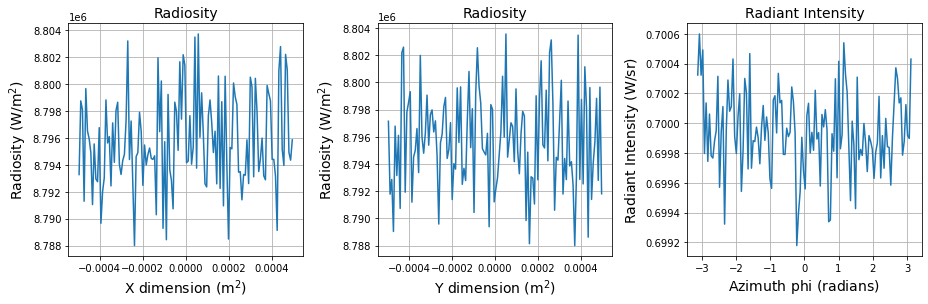

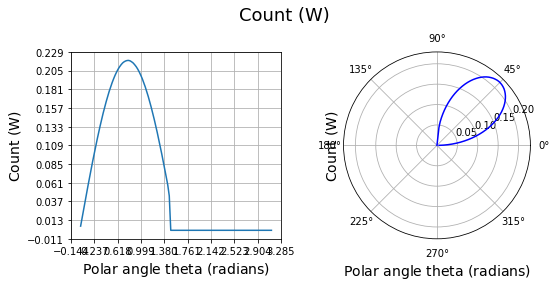

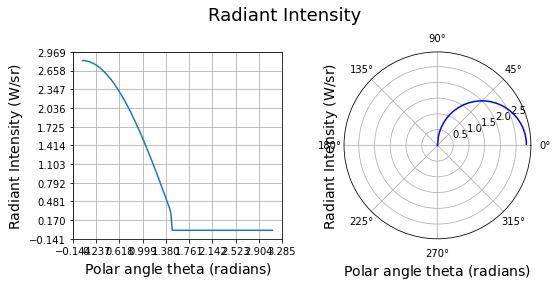

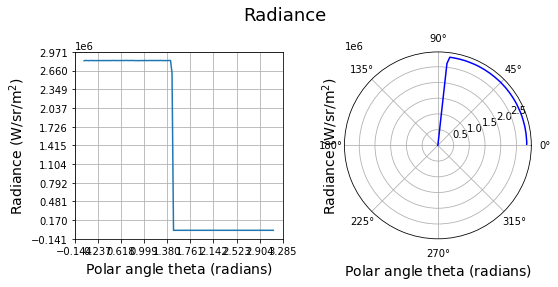

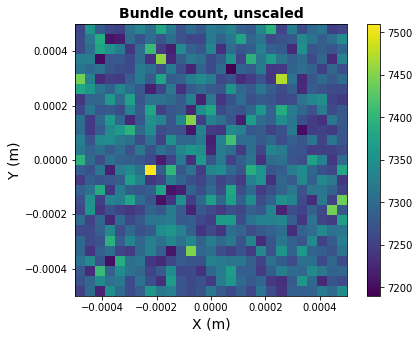

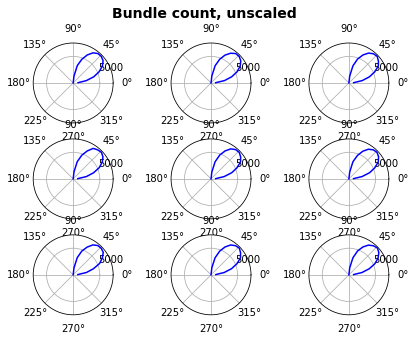

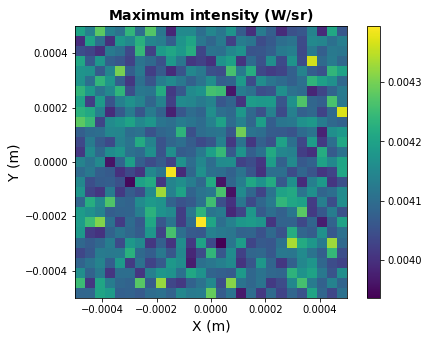

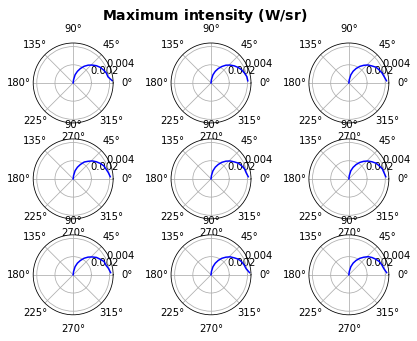

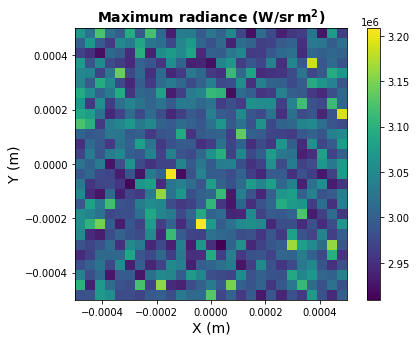

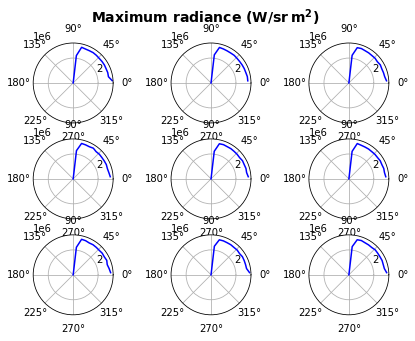

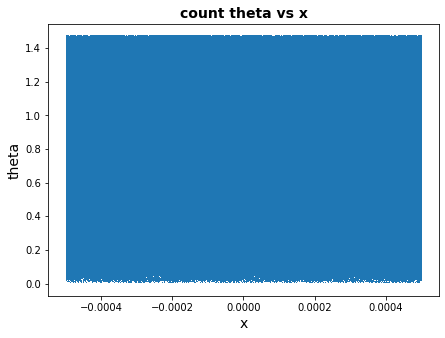

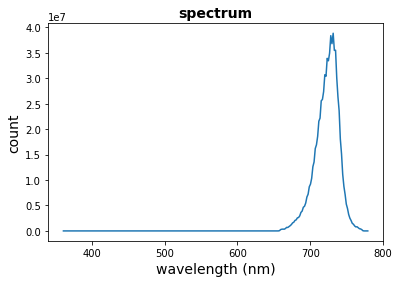

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Lightbox

total photons: 2.73e+16
photon bundle count: 6.82e+08
photon total energy (J): 7.49e-03
photon total power (W): 7.49e+00
luminous flux (lm): 9.20e+00


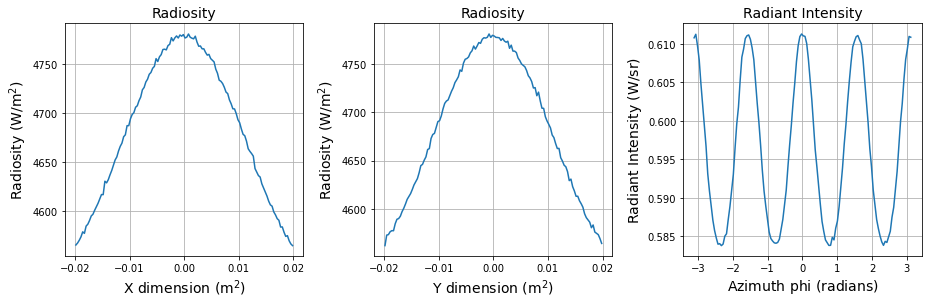

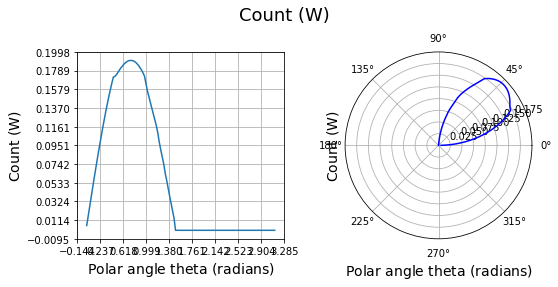

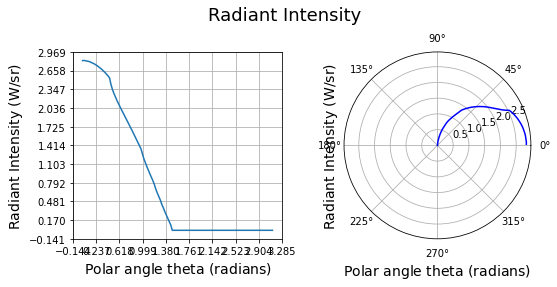

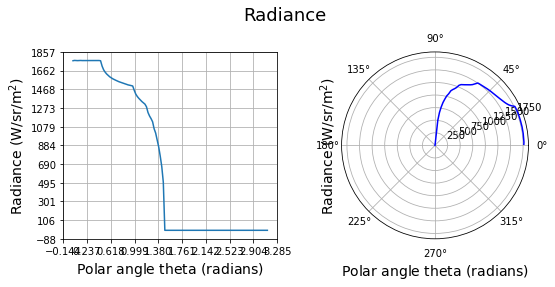

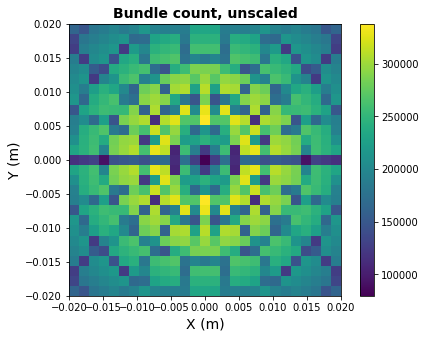

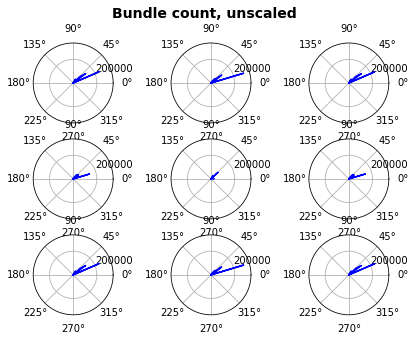

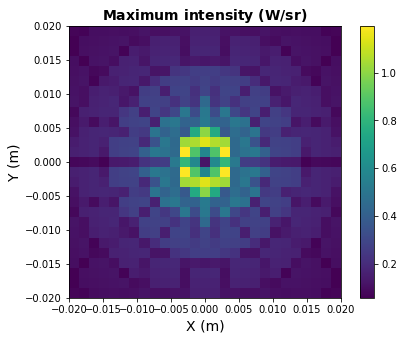

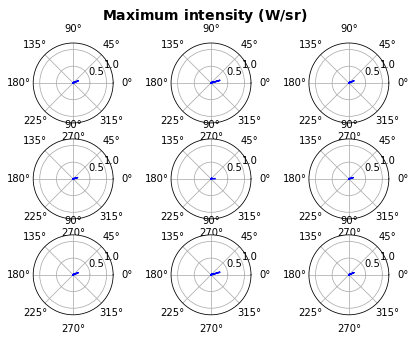

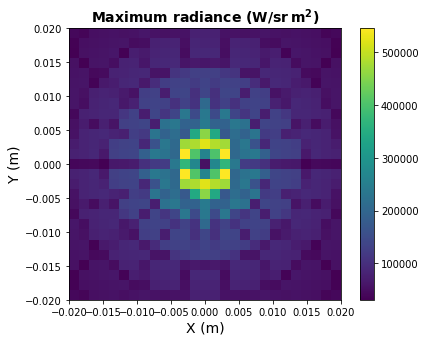

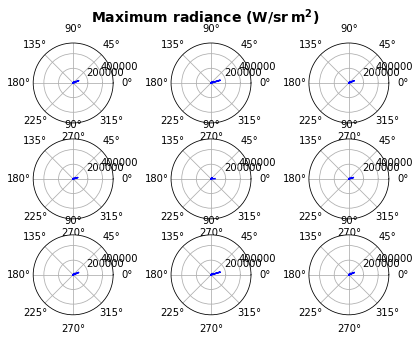

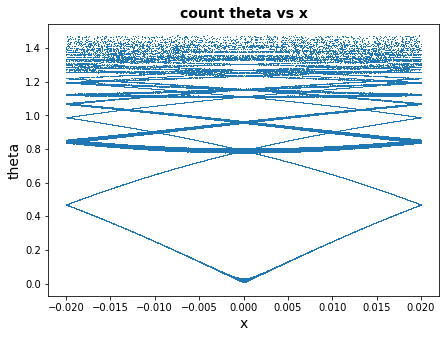

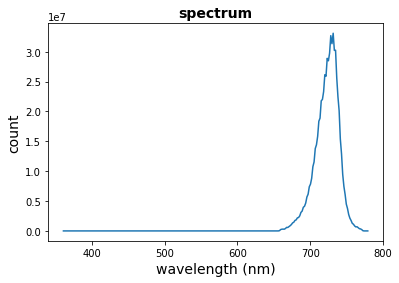

Output()

In [5]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

# <center> Diffuser

total photons: 1.70e+16
photon bundle count: 4.25e+08
photon total energy (J): 4.67e-03
photon total power (W): 4.67e+00
luminous flux (lm): 5.73e+00


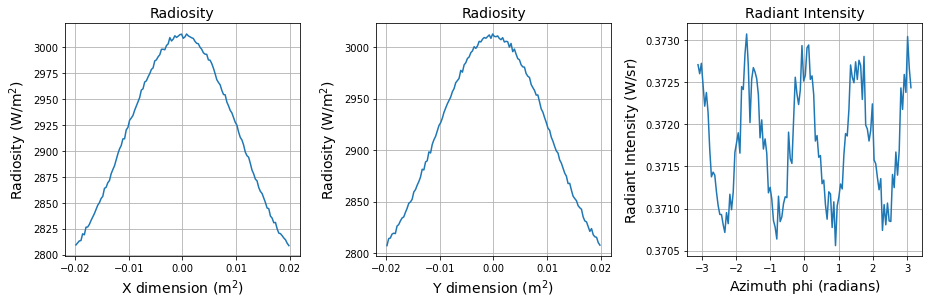

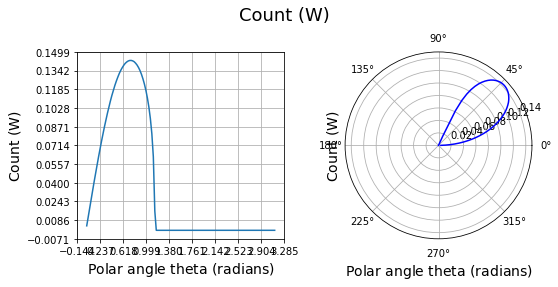

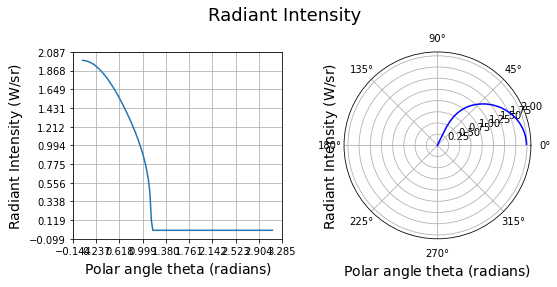

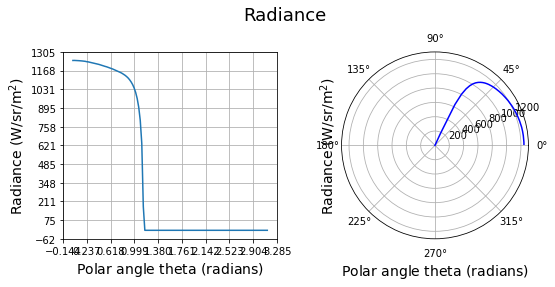

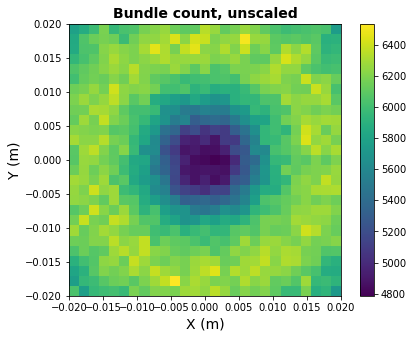

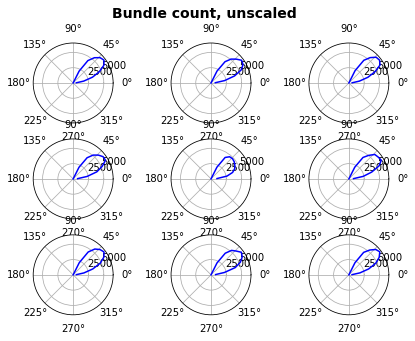

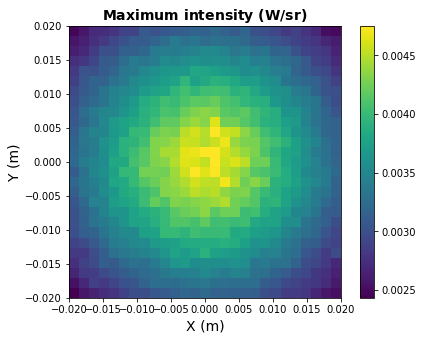

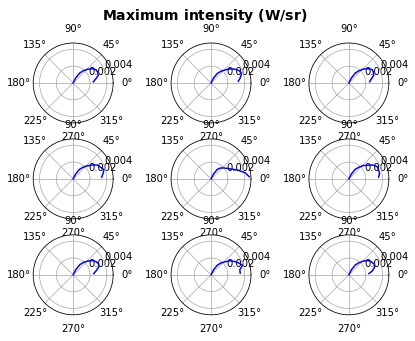

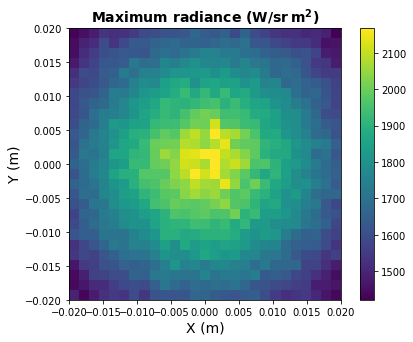

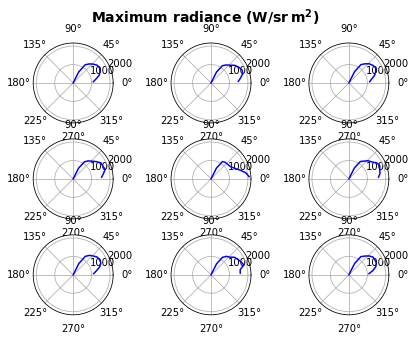

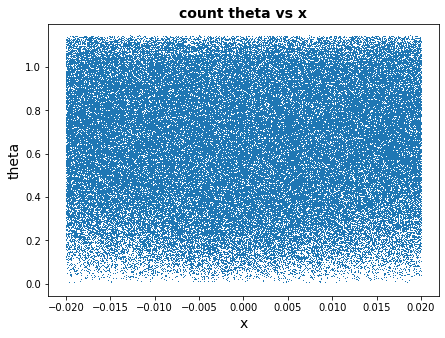

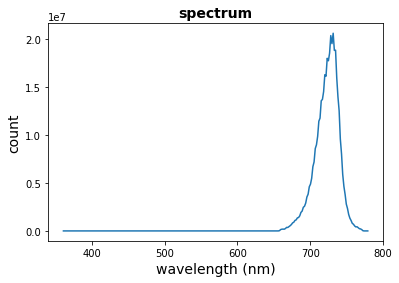

Output()

In [6]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

# <center> Outbound

total photons: 1.79e+12
photon bundle count: 4.47e+04
photon total energy (J): 4.92e-07
photon total power (W): 4.92e-04
luminous flux (lm): 6.12e-04


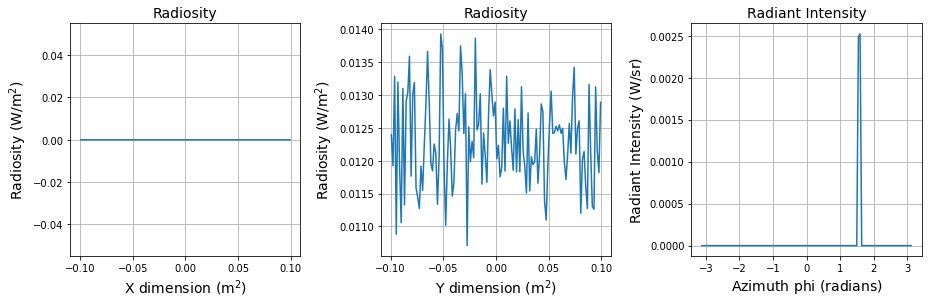

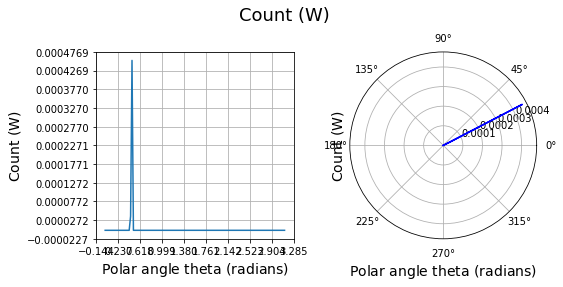

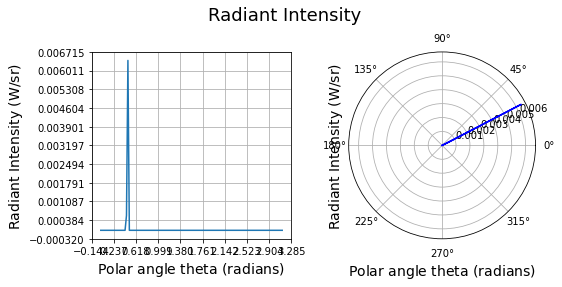

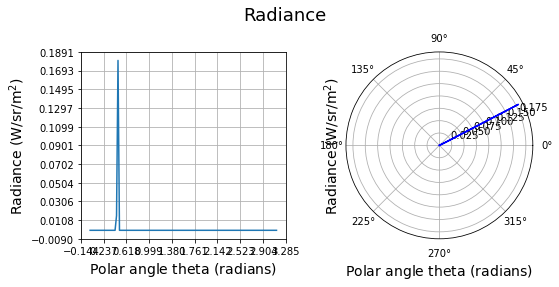

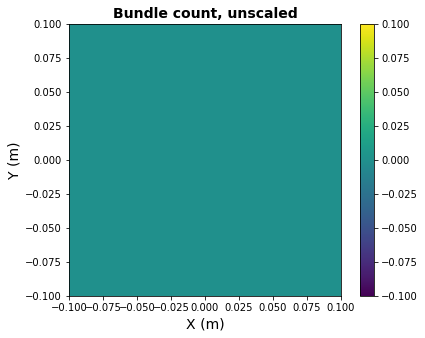

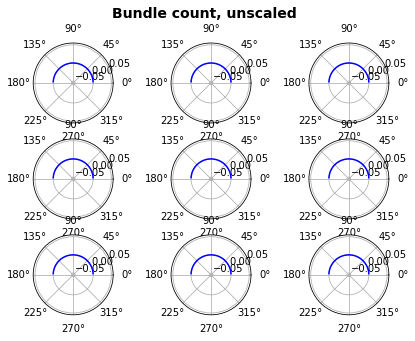

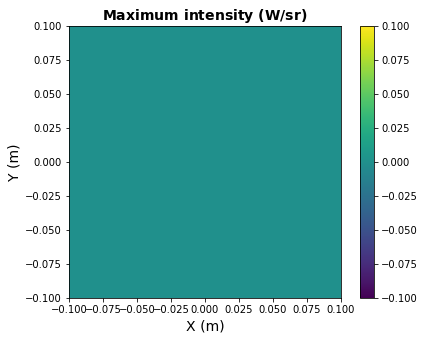

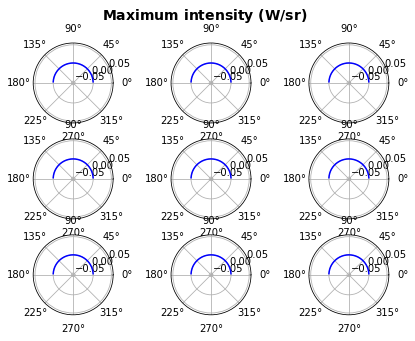

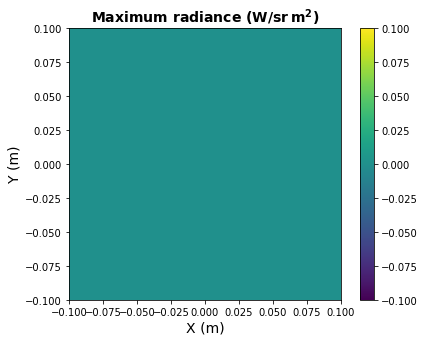

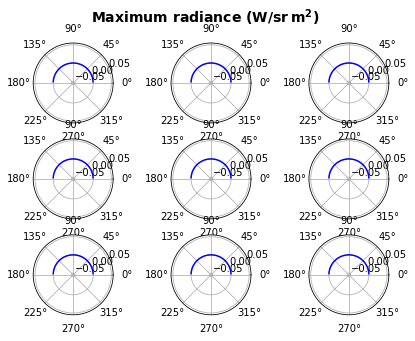

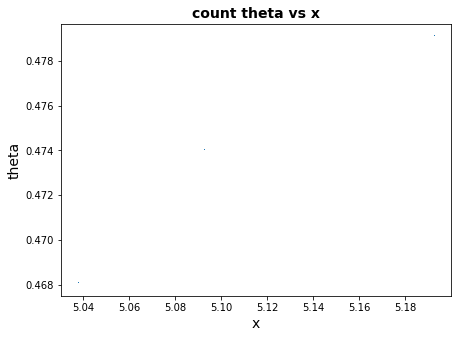

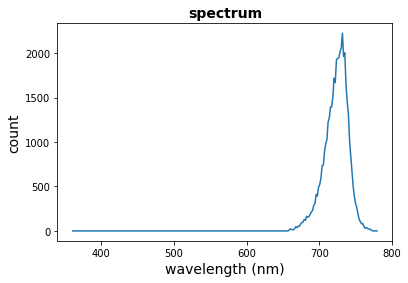

Output()

In [7]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

# <center> Inbound

total photons: 2.85e+11
photon bundle count: 7.12e+03
photon total energy (J): 7.82e-08
photon total power (W): 7.82e-05
luminous flux (lm): 9.35e-05


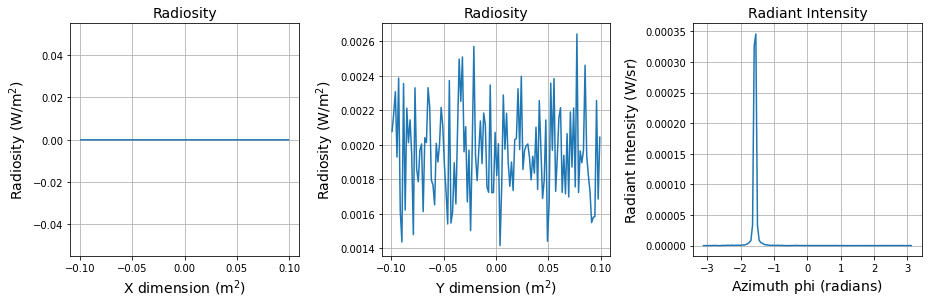

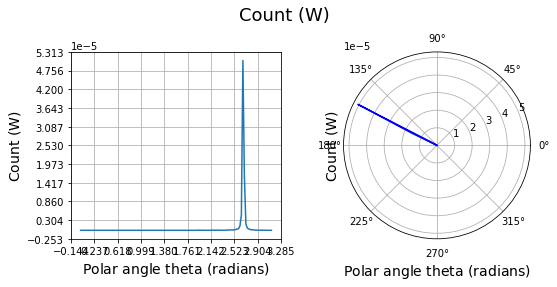

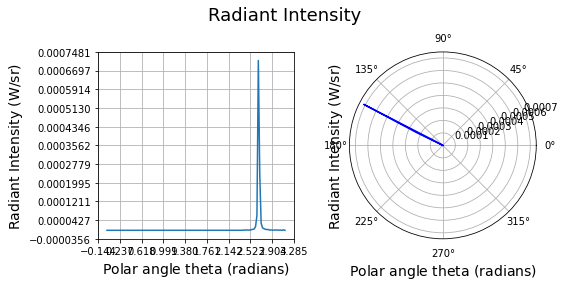

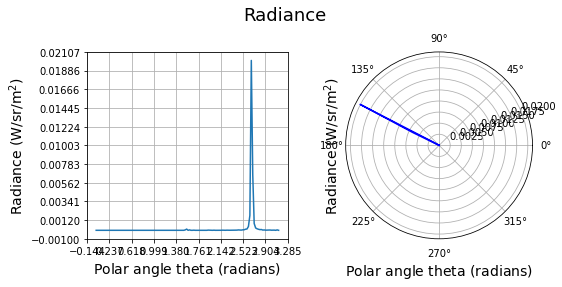

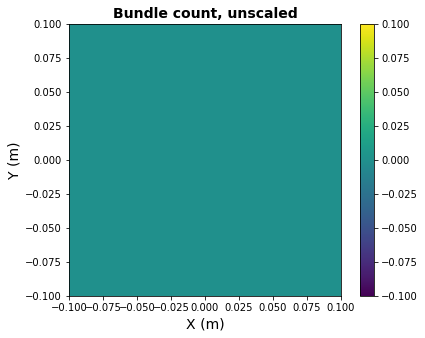

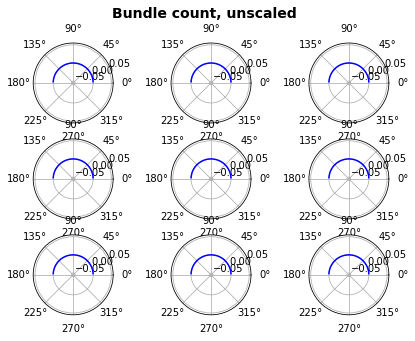

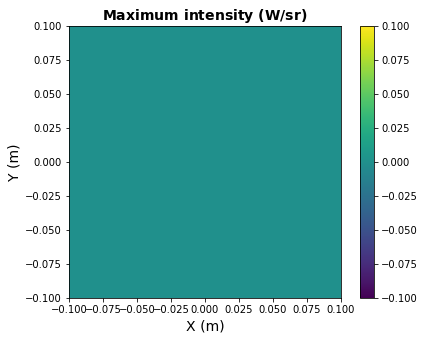

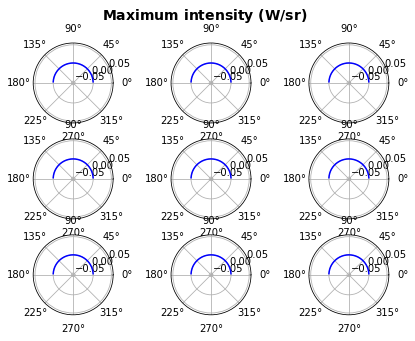

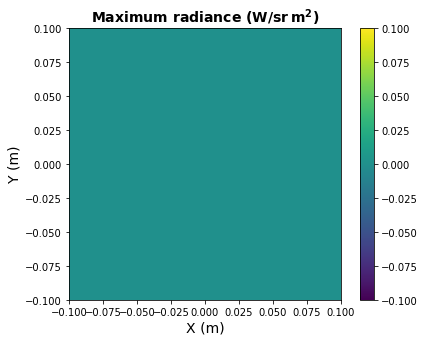

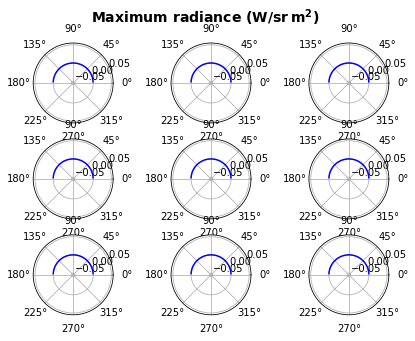

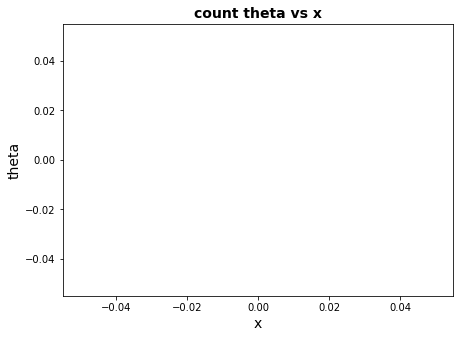

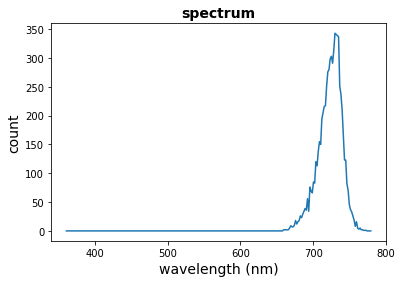

Output()

In [8]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

# <center> Camera Plane

total photons: 2.59e+11
photon bundle count: 6.47e+03
photon total energy (J): 7.12e-08
photon total power (W): 7.12e-05
luminous flux (lm): 8.47e-05


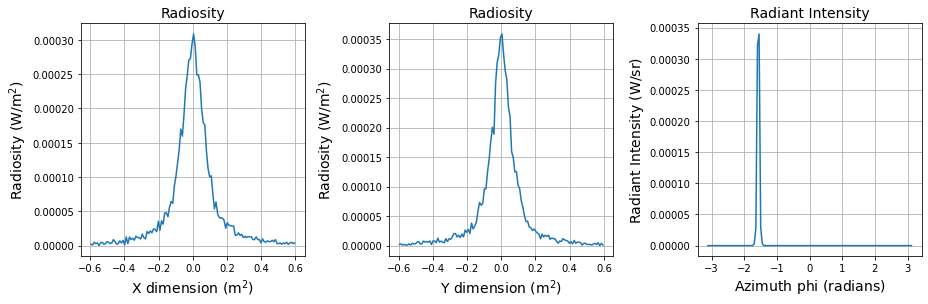

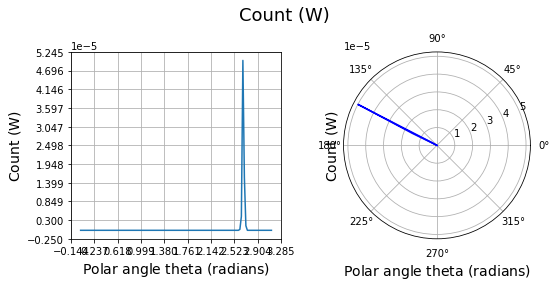

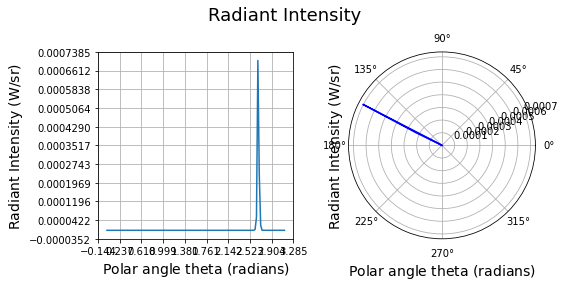

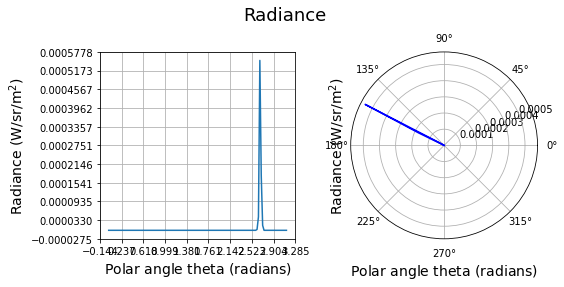

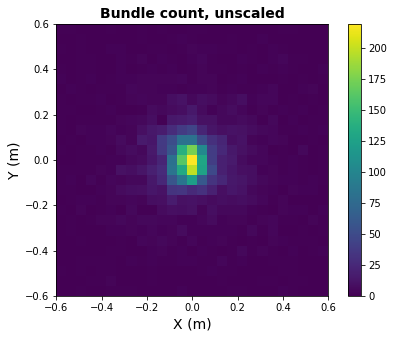

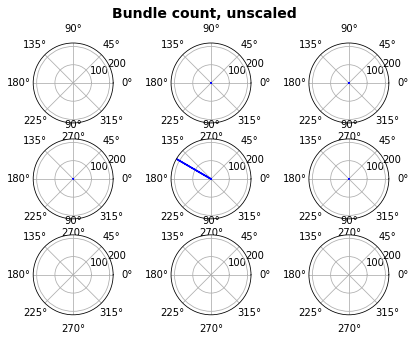

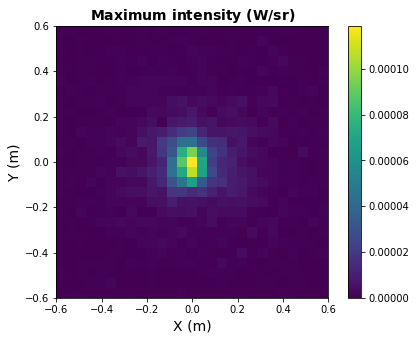

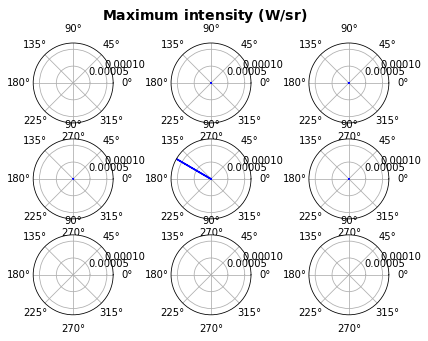

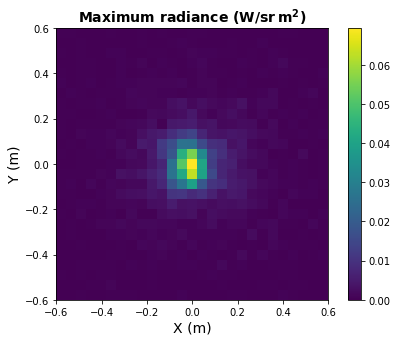

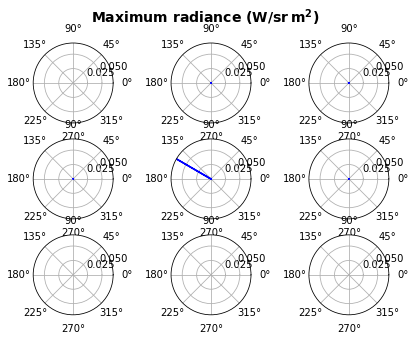

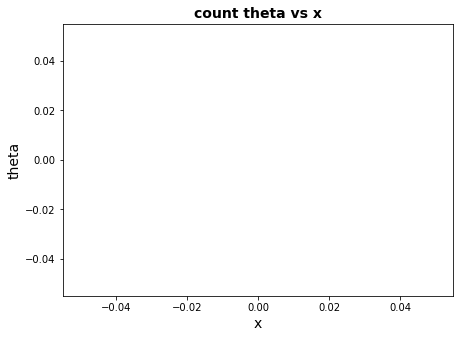

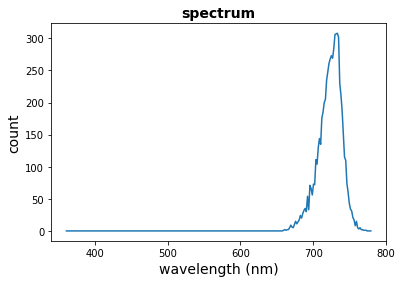

Output()

In [9]:
# before the filter
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

total photons: 2.19e+11
photon bundle count: 5.47e+03
photon total energy (J): 6.01e-08
photon total power (W): 6.01e-05
luminous flux (lm): 6.68e-05


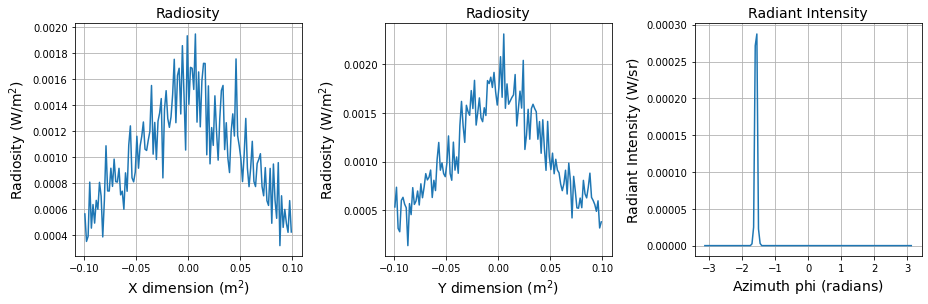

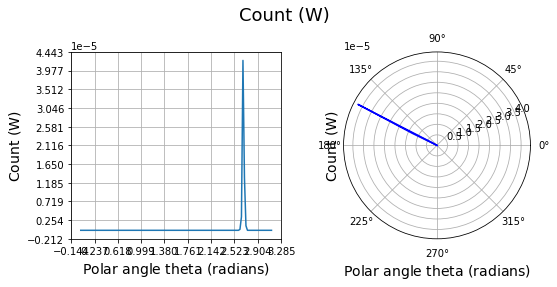

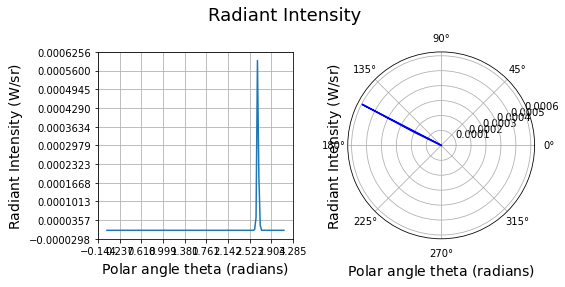

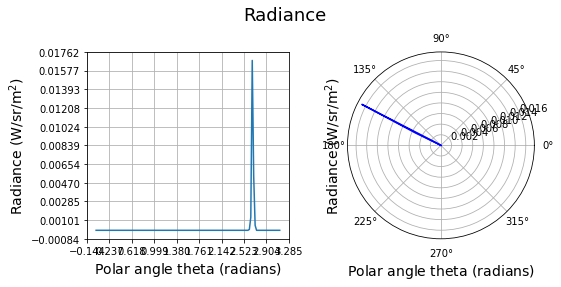

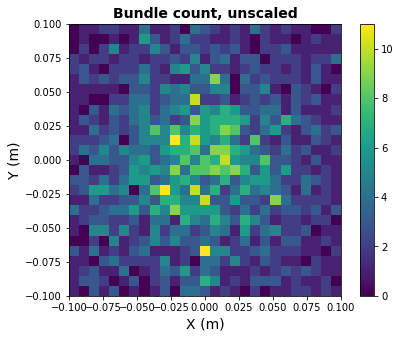

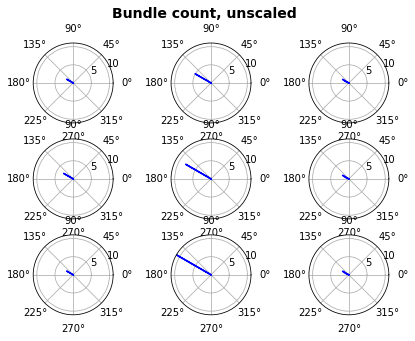

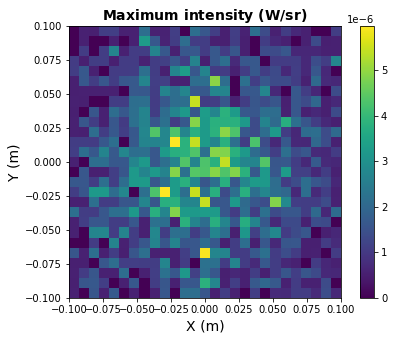

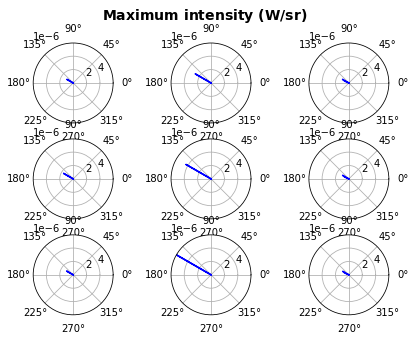

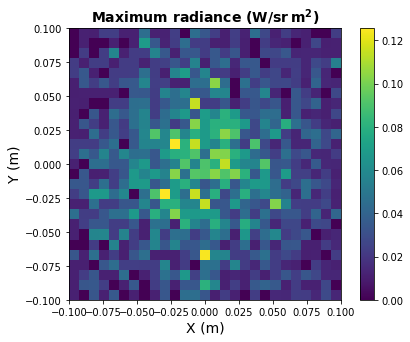

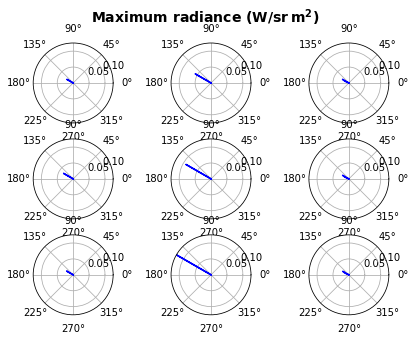

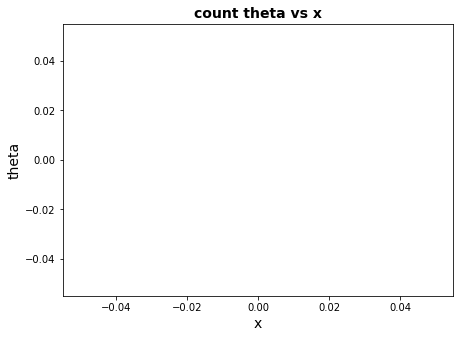

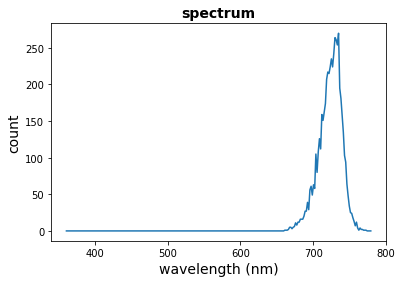

Output()

In [10]:
# after the filter
viz_cuda.summary(results._filter_stage)
viz_cuda.plot_all_histograms(results._filter_stage)
viz_cuda.plot_stages_3d([results._filter_stage])

total photons: 8.40e+08
photon bundle count: 2.10e+01
photon total energy (J): 2.30e-10
photon total power (W): 2.30e-07
luminous flux (lm): 1.70e-07


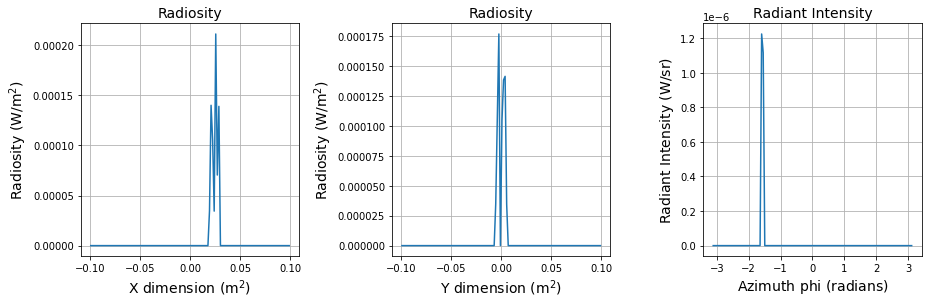

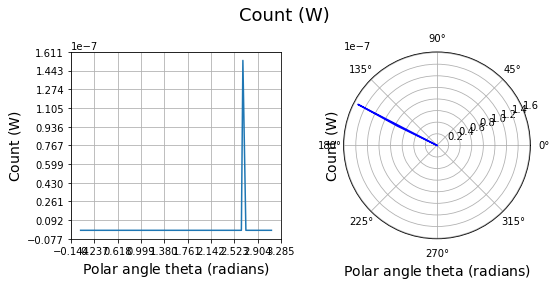

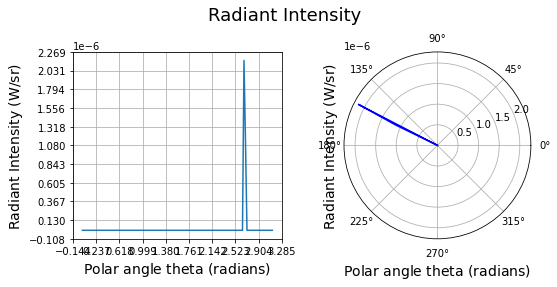

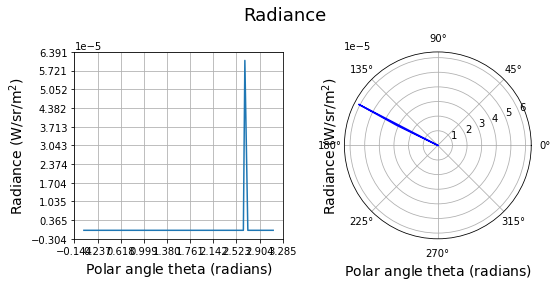

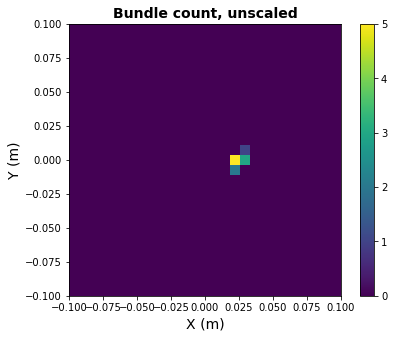

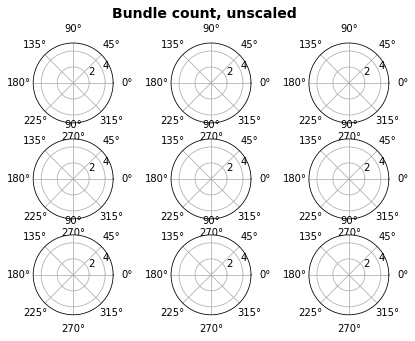

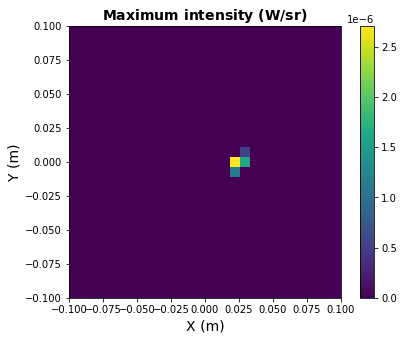

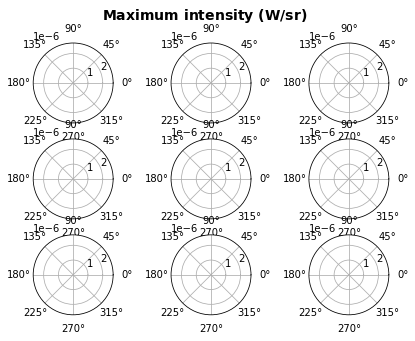

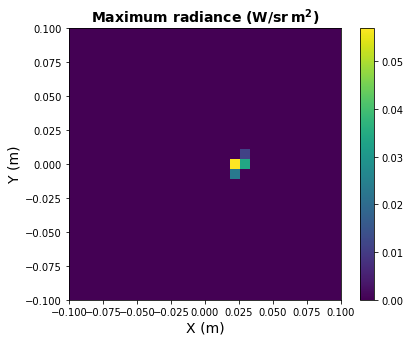

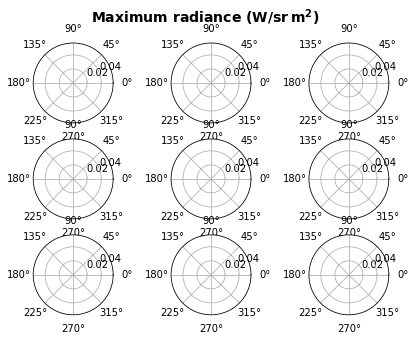

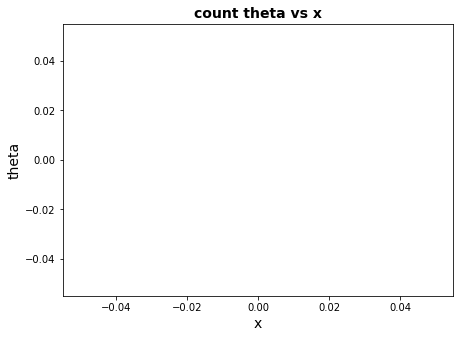

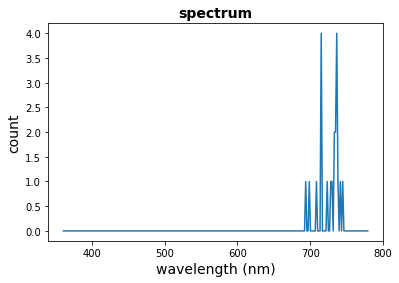

Output()

In [11]:
# same as the camera dimensions
viz_cuda.summary(results._camera_lens_stage)
viz_cuda.plot_all_histograms(results._camera_lens_stage)
viz_cuda.plot_stages_3d([results._camera_lens_stage])

In [12]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])

Output()

In [13]:
print(f"camera total {simulator._camera._total_electrons:.2e}")

camera total 6.40e+08
